# Projet 12 : Détectez des faux billets

## 1. Introduction

L'objectif de ce projet est de construire un modèle d'apprentissage automatique capable de détecter les faux billets en fonction de leurs dimensions géométriques. Nous effectuerons les étapes suivantes :

1.  **Nettoyage des données** : Traiter les valeurs manquantes dans l'ensemble de données.
2.  **Analyse exploratoire des données (AED)** : Visualiser les données pour comprendre les relations et les distributions.
3.  **Apprentissage non supervisé** : Utiliser le clustering K-Means pour explorer les motifs dans les données.
4.  **Apprentissage supervisé** : Entraîner un modèle de régression logistique pour classifier les billets.
5.  **Comparaison des modèles** : Comparer les performances des modèles.
6.  **Application** : Démontrer comment utiliser le modèle entraîné pour les prédictions.
7.  **Déploiement du modèle** : Démontrer comment utiliser le modèle entraîné pour les prédictions.
8.  **Conclusion** : Résumer les résultats et les conclusions.


### Ensemble de données
L'ensemble de données `billets.csv` contient les dimensions des billets et une étiquette binaire `is_genuine` indiquant si le billet est vrai ou faux.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets/billets.csv', sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## 2. Nettoyage et Préparation des Données

Nous commençons par vérifier les valeurs manquantes dans l'ensemble de données.

In [6]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
df[df['margin_low'].isnull()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


### Imputation des Valeurs Manquantes

La colonne `margin_low` contient des valeurs manquantes. Au lieu de les remplir simplement avec la moyenne ou la médiane, ce qui pourrait fausser la distribution, nous utilisons un modèle de **Régression Linéaire**. 
Nous prédisons `margin_low` en fonction des autres caractéristiques géométriques (`diagonal`, `height_left`, `height_right`, `margin_up`, `length`), qui sont probablement corrélées.

In [8]:
from sklearn.linear_model import LinearRegression

# Séparer les lignes complètes et incomplètes
df_complete = df[df['margin_low'].notna()]
df_missing = df[df['margin_low'].isna()]

# Entraîner le modèle de régression
X_train = df_complete[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']]
y_train = df_complete['margin_low']
model = LinearRegression().fit(X_train, y_train)

# Prédire les valeurs manquantes
df.loc[df['margin_low'].isna(), 'margin_low'] = model.predict(df_missing[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']])

In [9]:
df_compare = df_missing.copy()
df_compare['predicted_margin_low'] = model.predict(df_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']])
df_compare[['margin_low', 'predicted_margin_low']]

,margin_low,predicted_margin_low
72,NaN,4.318525
99,NaN,4.393668
151,NaN,4.410457
197,NaN,4.319014
241,NaN,4.650617
251,NaN,3.803308
284,NaN,4.179736
334,NaN,4.127442
410,NaN,4.135034
413,NaN,4.160539


## 3. Analyse Exploratoire des Données (AED)

Nous visualisons les données pour comprendre la distribution des caractéristiques et la séparation entre les vrais et les faux billets.

In [10]:
print("Missing values after imputation:")
print(df.isnull().sum())
print(f"\nTarget distribution:\n{df['is_genuine'].value_counts()}")

Missing values after imputation:
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Target distribution:
is_genuine
True     1000
False     500
Name: count, dtype: int64


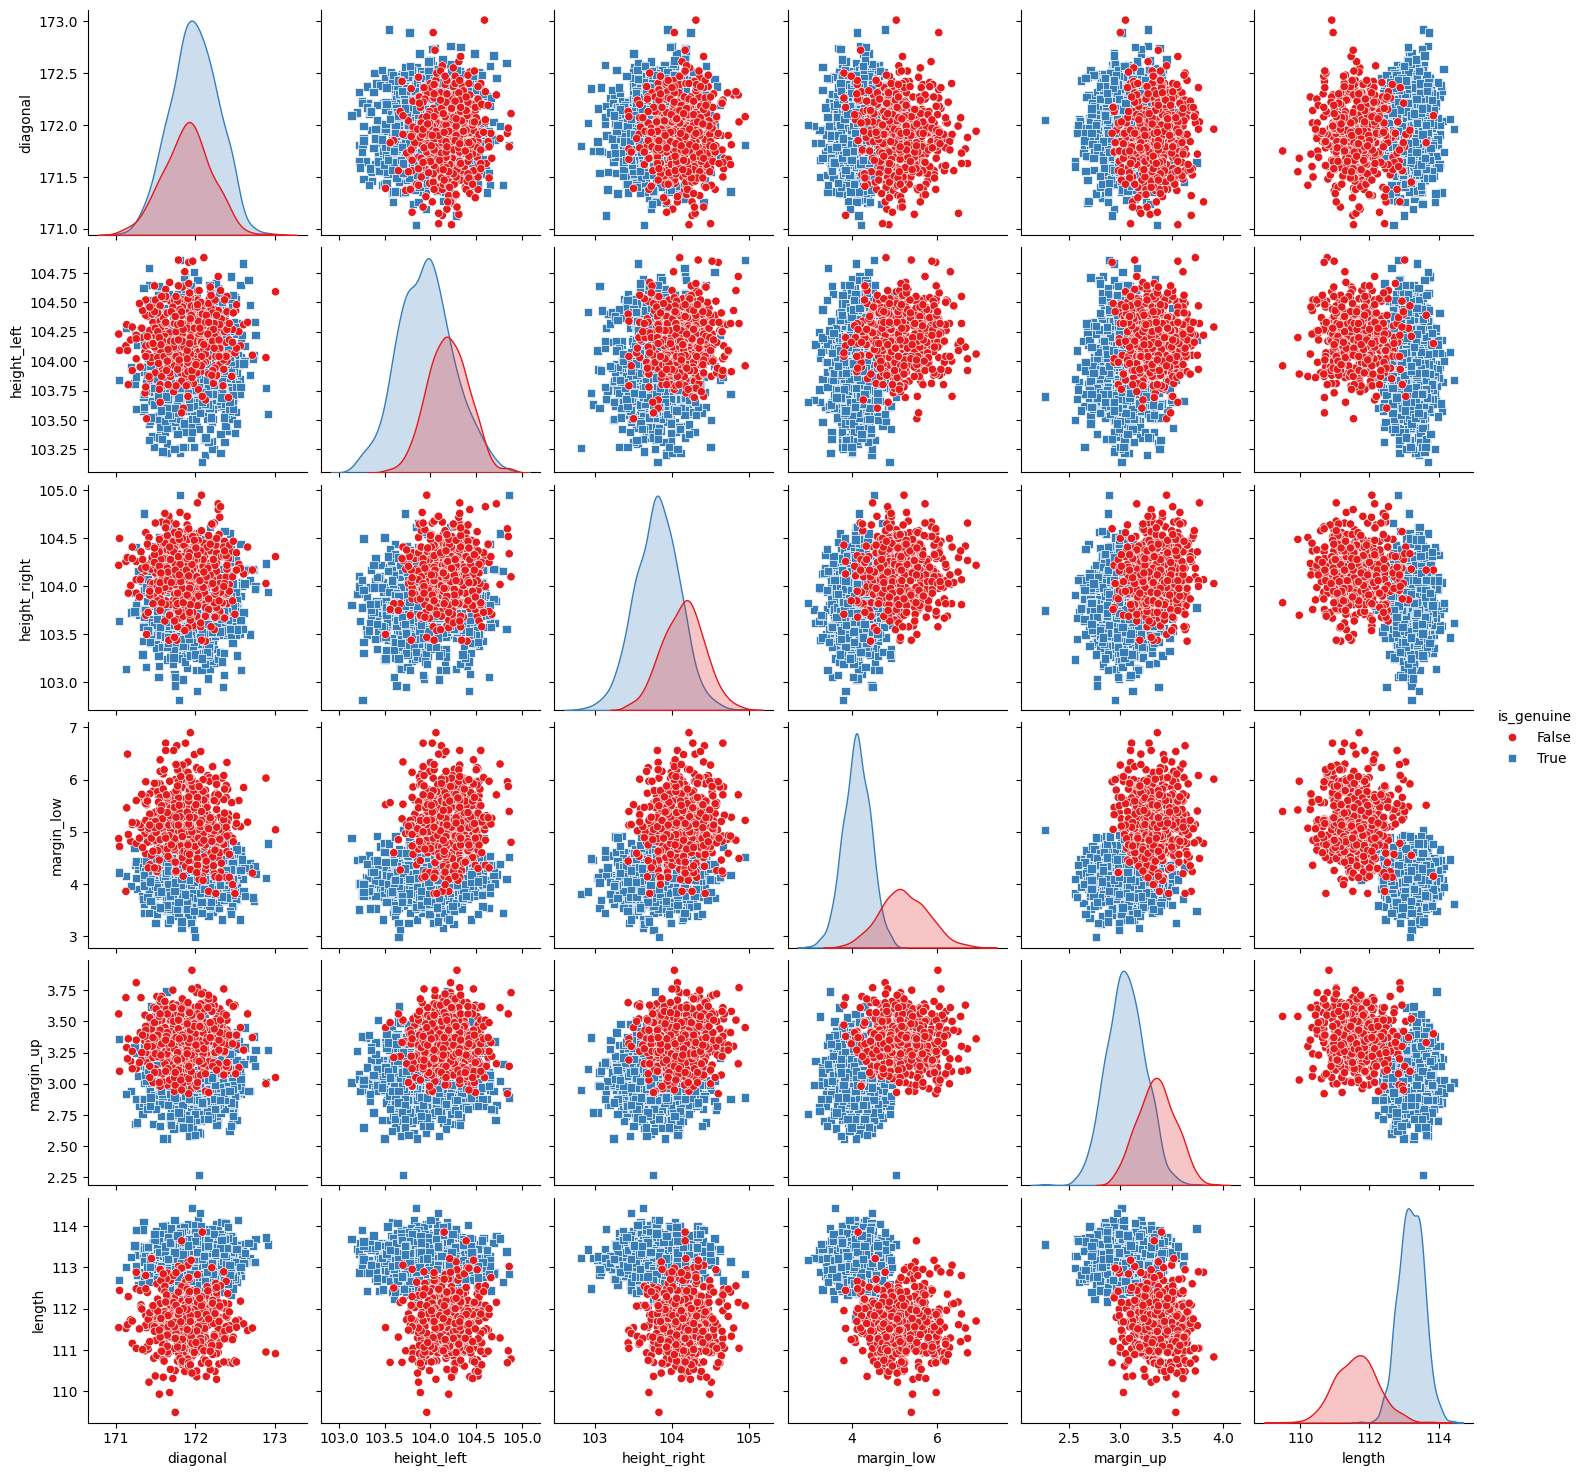

<Figure size 1000x800 with 0 Axes>

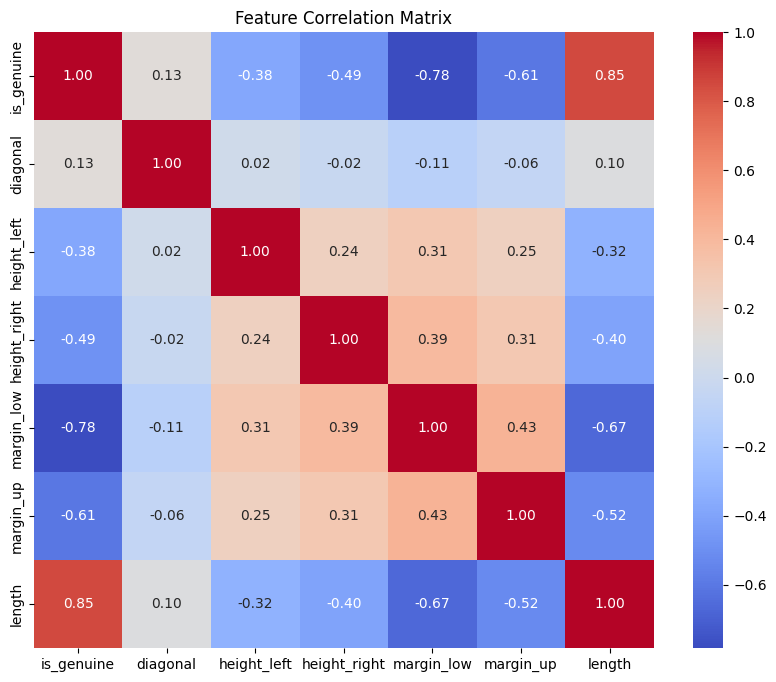

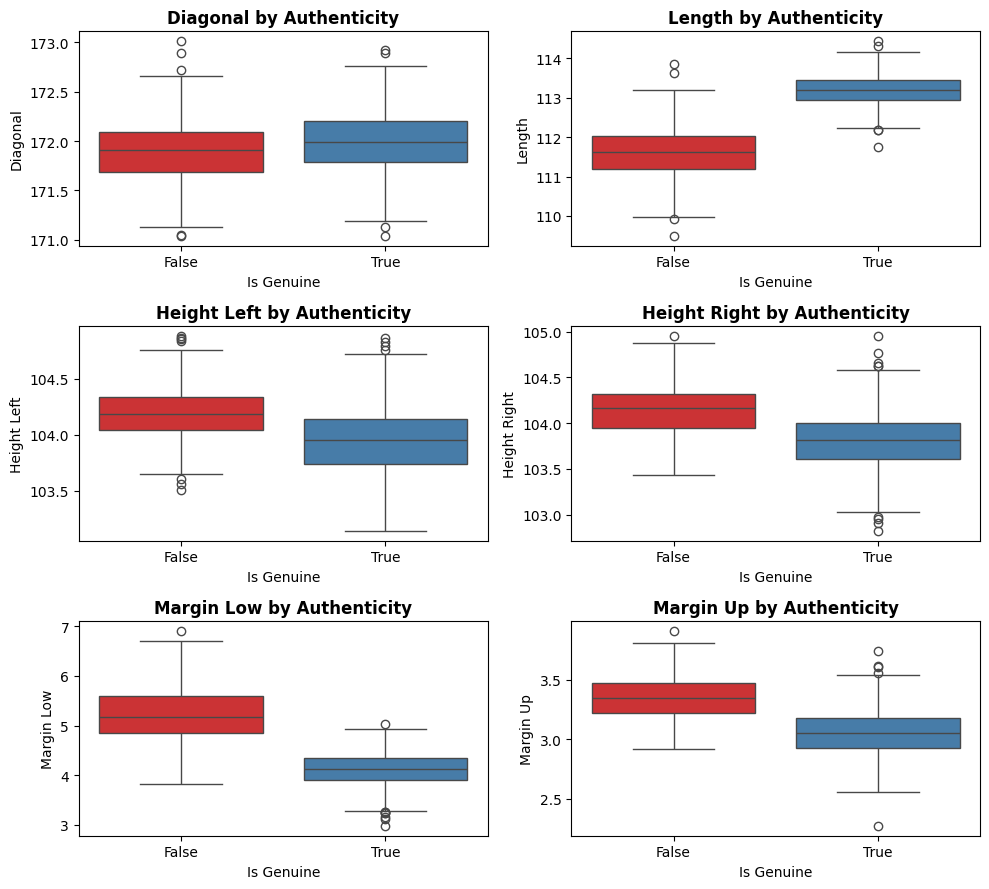

In [11]:
# Pairplot pour visualiser les relations
sns.pairplot(df, hue='is_genuine', palette='Set1', markers=['o', 's'])
plt.figure(figsize=(10, 8))
plt.suptitle("Pairplot of Banknote Dimensions", y=1.08)
plt.show()

# Carte de chaleur des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Boîtes à moustaches pour toutes les caractéristiques
features = ['diagonal', 'length', 'height_left', 'height_right', 'margin_low', 'margin_up']

fig, axes = plt.subplots(3, 2, figsize=(10, 9))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(x='is_genuine', y=feature, data=df, ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'{feature.replace("_", " ").title()} by Authenticity', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Is Genuine', fontsize=10)
    axes[idx].set_ylabel(feature.replace("_", " ").title(), fontsize=10)

plt.tight_layout()
plt.show()
plt.show()

From the graph we can observe that length, margin low, and margin up have very strong correlation with the target variable is_genuine. Whereas, height right and left have moderate correlation and diagonal has very weak correlation with the target variables.

Moreover, genuine bill tend to have longer length than the fake bill. In contrast, fake bill tend to have taller height right and left and longer margin low and up than the genuine bill.

## 4. Apprentissage Non Supervisé

In [12]:
# Préparer les données pour la modélisation
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Standardiser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set target distribution:\n{y_train.value_counts()}")
print(f"\nTest set target distribution:\n{y_test.value_counts()}")

Training set size: 1050
Test set size: 450

Training set target distribution:
is_genuine
True     700
False    350
Name: count, dtype: int64

Test set target distribution:
is_genuine
True     300
False    150
Name: count, dtype: int64


### K-means
Nous appliquons le clustering K-Means pour voir si les billets se regroupent naturellement en deux clusters (vrais vs faux) sans utiliser les étiquettes. Nous déterminerons le nombre optimal de clusters $k$ en utilisant la méthode du coude (Elbow Method) et le score de silhouette.

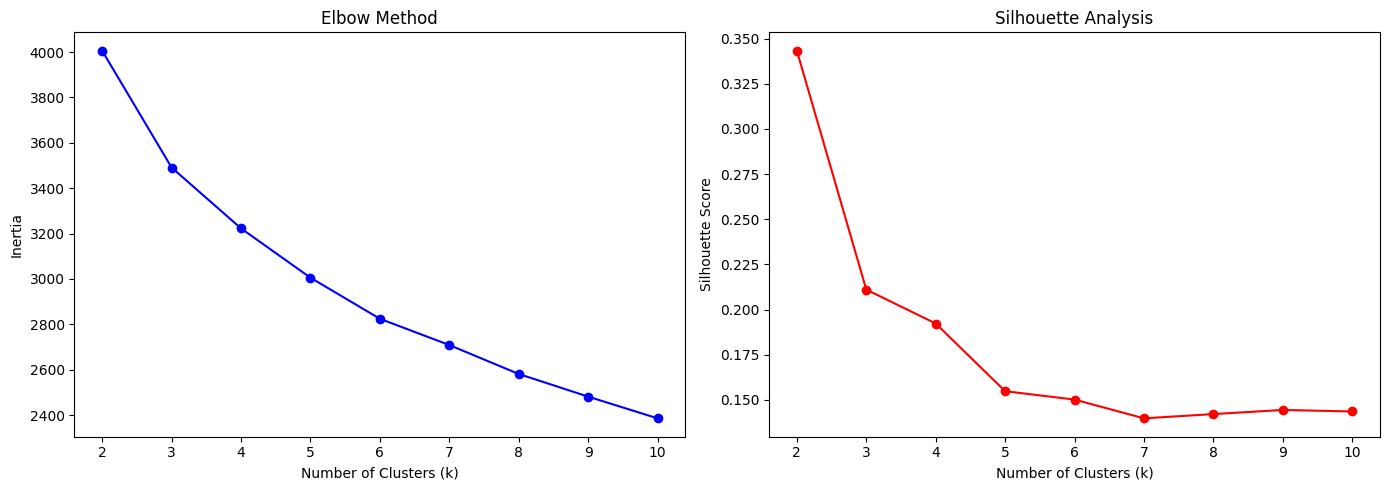

[0.34333381531899526, 0.21105624103988896, 0.19227324003625826, 0.15479488201921185, 0.15014372408850898, 0.13976037935201407, 0.1421223702969749, 0.14440888231388785, 0.14355656858996965]


In [13]:
# Algorithme 1 : Clustering K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Déterminer le nombre optimal de clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
plt.tight_layout()
plt.show()

print(silhouette_scores)

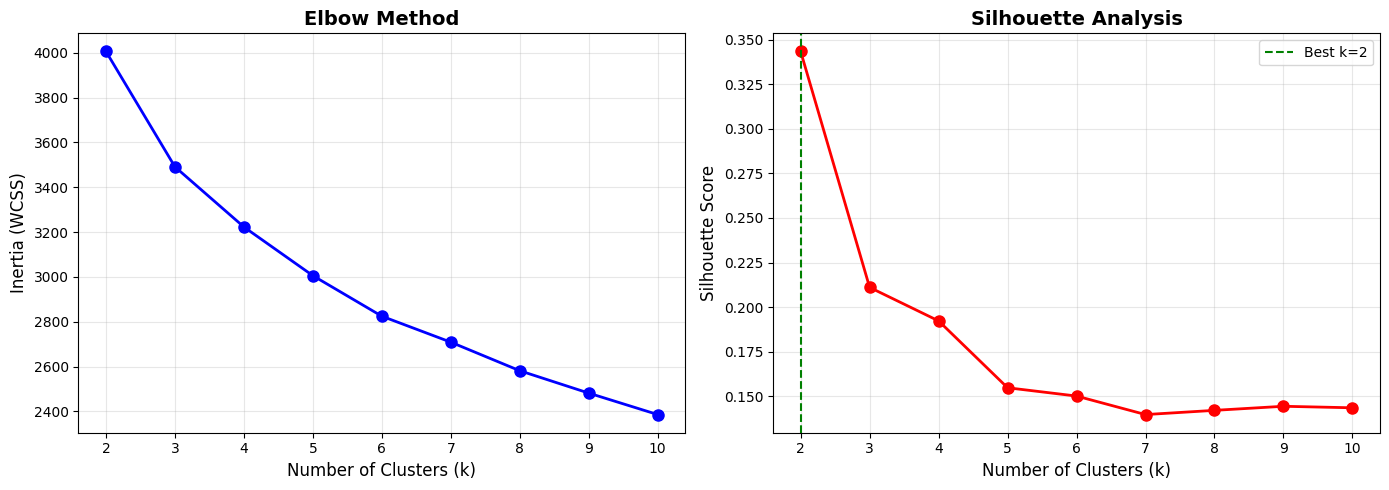

Best K according to Silhouette Score: 2 with score 0.3433


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Determine optimal number of clusters using both methods
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Create comparison visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette Method
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
best_k_silhouette = K_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=best_k_silhouette, color='g', linestyle='--', label=f'Best k={best_k_silhouette}')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Best K according to Silhouette Score: {best_k_silhouette} with score {max(silhouette_scores):.4f}")

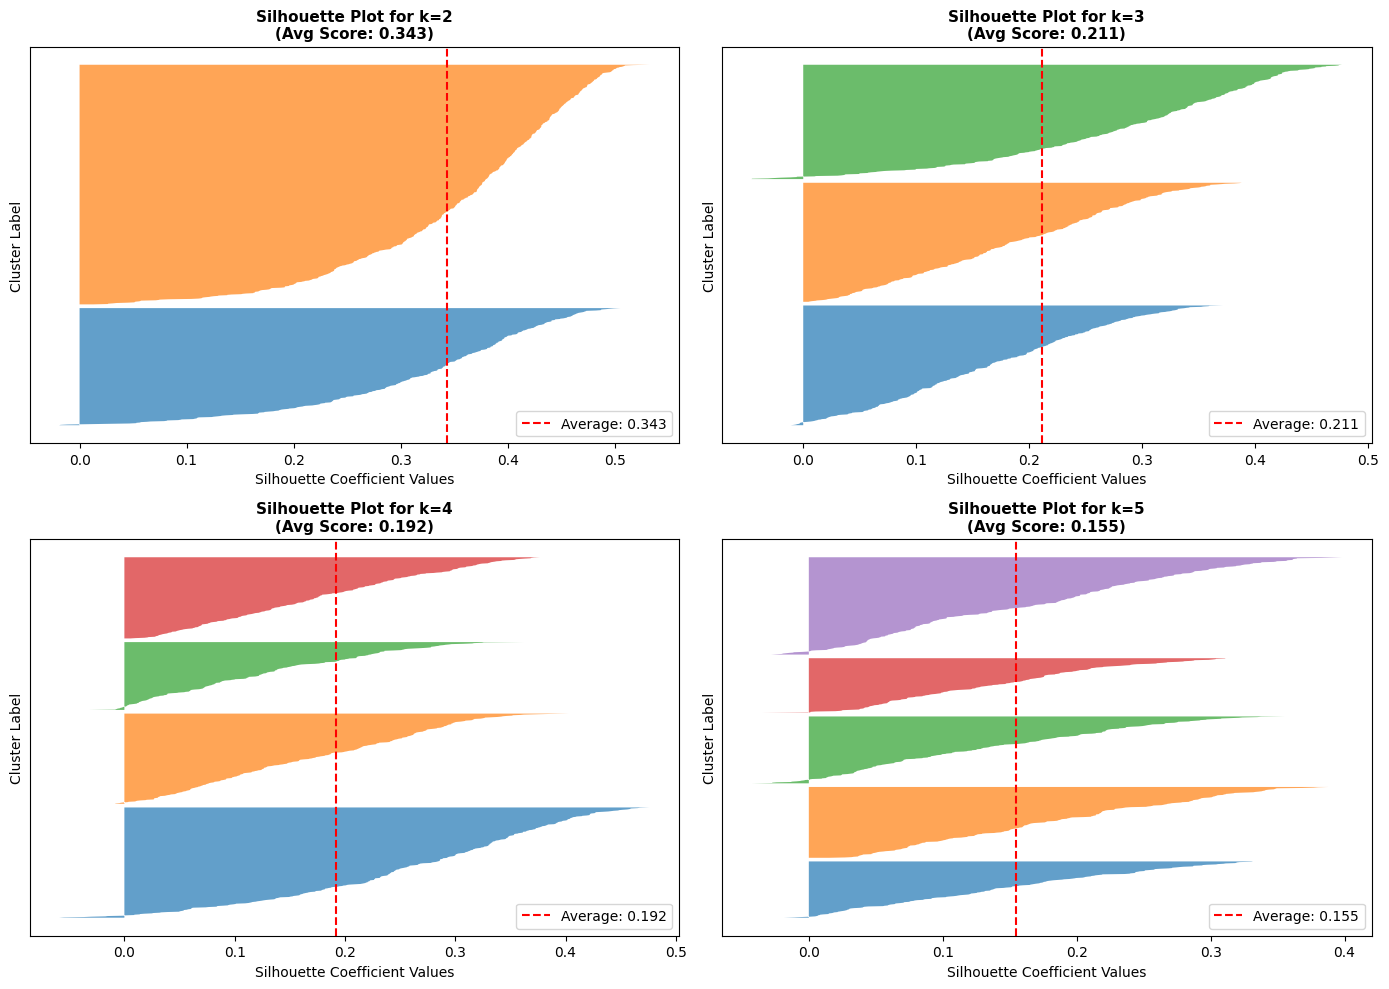

In [25]:
# Detailed Silhouette plots for each k value
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, k in enumerate([2, 3, 4, 5]):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)
    
    ax = axes[idx]
    y_lower = 10
    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         alpha=0.7)
        y_lower = y_upper + 10
    
    ax.set_xlabel('Silhouette Coefficient Values', fontsize=10)
    ax.set_ylabel('Cluster Label', fontsize=10)
    ax.set_title(f'Silhouette Plot for k={k}\n(Avg Score: {silhouette_avg:.3f})', fontsize=11, fontweight='bold')
    ax.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Average: {silhouette_avg:.3f}')
    ax.set_yticks([])
    ax.legend()

plt.tight_layout()
plt.show()

Base on the silhouette scores, we choose k=2 for K-Means clustering because it has the highest silhouette score of 0.34 which is an acceptable value indicating well-defined clusters.

In [15]:
# Entraîner K-Means avec k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_kmeans_train = kmeans.fit_predict(X_train)
y_pred_kmeans_test = kmeans.predict(X_test)

# Mapper les clusters aux vrais billets (1=vrai, 0=faux)
cluster_mapping = {}
for cluster in [0, 1]:
    cluster_genuine_ratio = y_train[y_pred_kmeans_train == cluster].sum() / (y_pred_kmeans_train == cluster).sum()
    cluster_mapping[cluster] = 1 if cluster_genuine_ratio > 0.5 else 0

y_pred_kmeans_test_mapped = np.array([cluster_mapping[c] for c in y_pred_kmeans_test])

print("K-Means Results:")
print(confusion_matrix(y_test, y_pred_kmeans_test_mapped))
print(classification_report(y_test, y_pred_kmeans_test_mapped))

K-Means Results:
[[146   4]
 [  3 297]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       150
        True       0.99      0.99      0.99       300

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## 5. Apprentissage Supervisé

### Régression Logistique

Nous utilisons la Régression Logistique comme modèle de référence. C'est un modèle simple et interprétable bien adapté aux tâches de classification binaire.

In [16]:
# Algorithme 2 : Régression Logistique
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
y_pred_proba_logreg = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_logreg):.4f}")

Logistic Regression Results:
[[148   2]
 [  1 299]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       150
        True       0.99      1.00      1.00       300

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

ROC-AUC Score: 0.9993


### KNN

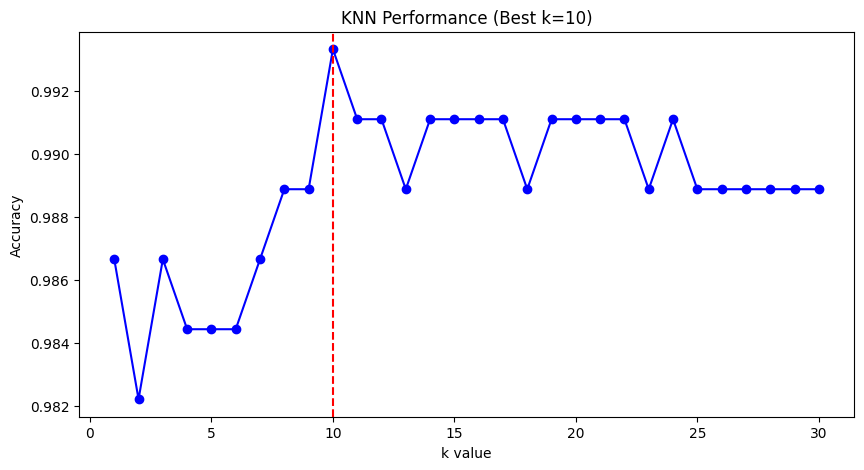

KNN Results (k=10):
[[148   2]
 [  1 299]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       150
        True       0.99      1.00      1.00       300

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

ROC-AUC Score: 0.9960


In [17]:
# Algorithme 3 : KNN
from sklearn.neighbors import KNeighborsClassifier

# Trouver le k optimal
accuracies = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

best_k = k_values[np.argmax(accuracies)]
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title(f'KNN Performance (Best k={best_k})')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

print(f"KNN Results (k={best_k}):")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

### Classificateur Random Forest

Random Forest Results:
[[147   3]
 [  2 298]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       150
        True       0.99      0.99      0.99       300

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

ROC-AUC Score: 0.9991


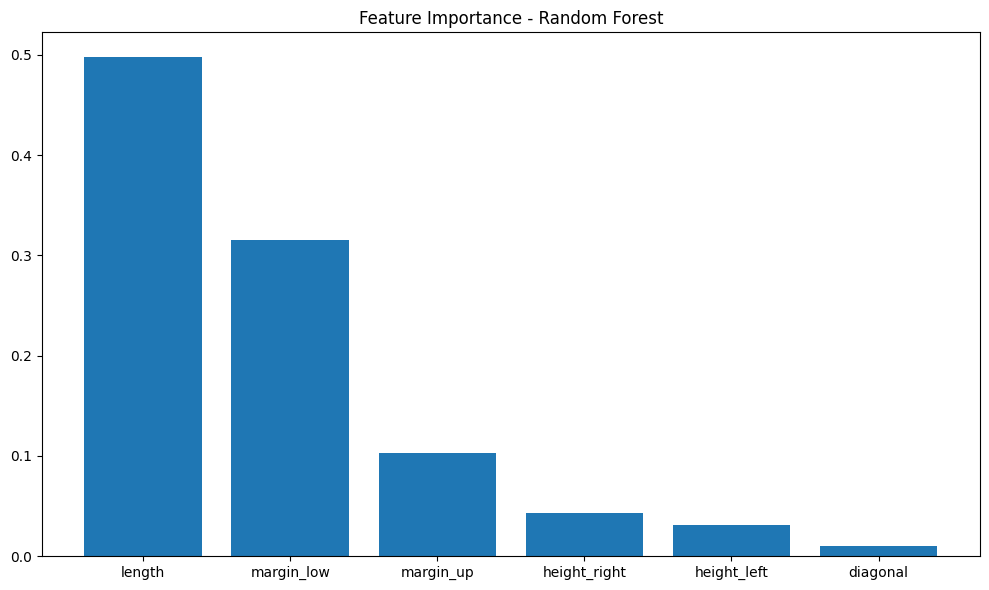

In [18]:
# Algorithme 4 : Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Importance des caractéristiques
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=0)
plt.tight_layout()
plt.show()

## 6. Comparaison des Modèles

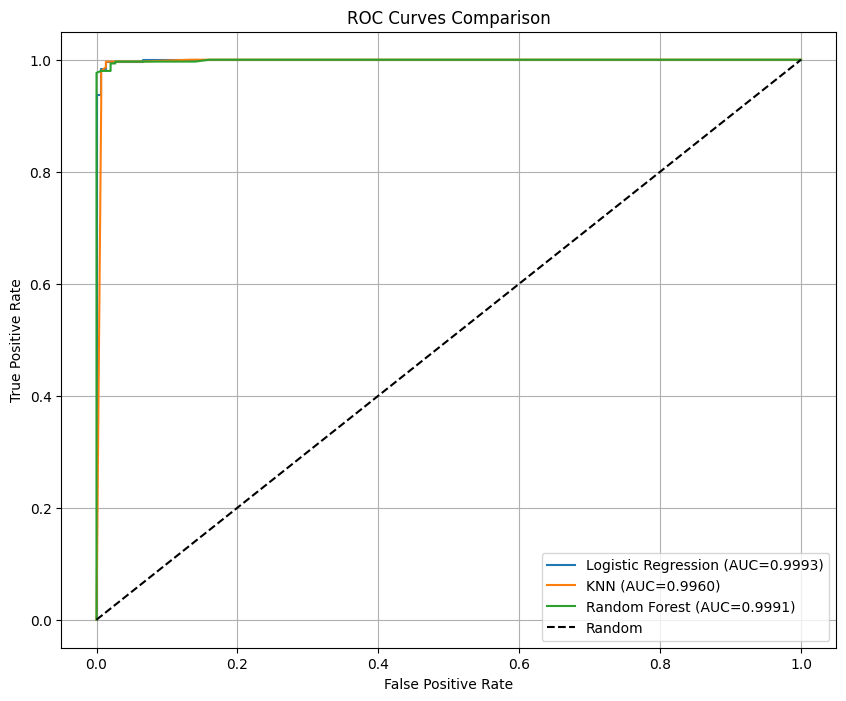


MODEL COMPARISON SUMMARY
              Model  Accuracy      AUC
Logistic Regression  0.993333 0.999289
                KNN  0.993333 0.996022
      Random Forest  0.988889 0.999133


In [19]:
# Comparer tous les modèles
models_comparison = {
    'Logistic Regression': {
        'predictions': y_pred_logreg,
        'probabilities': y_pred_proba_logreg,
        'auc': roc_auc_score(y_test, y_pred_proba_logreg)
    },
    'KNN': {
        'predictions': y_pred_knn,
        'probabilities': y_pred_proba_knn,
        'auc': roc_auc_score(y_test, y_pred_proba_knn)
    },
    'Random Forest': {
        'predictions': y_pred_rf,
        'probabilities': y_pred_proba_rf,
        'auc': roc_auc_score(y_test, y_pred_proba_rf)
    }
}

# Comparaison des courbes ROC
plt.figure(figsize=(10, 8))
for model_name, model_data in models_comparison.items():
    fpr, tpr, _ = roc_curve(y_test, model_data['probabilities'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={model_data['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid()
plt.show()

# Tableau récapitulatif
summary_data = []
for model_name, model_data in models_comparison.items():
    summary_data.append({
        'Model': model_name,
        'Accuracy': (model_data['predictions'] == y_test).mean(),
        'AUC': model_data['auc']
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print(summary_df.to_string(index=False))

## 7. Application 

In [20]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Charger et préparer les données (comme dans le notebook principal)
df = pd.read_csv('datasets/billets.csv', sep=';')

from sklearn.linear_model import LinearRegression
df_complete = df[df['margin_low'].notna()]
df_missing = df[df['margin_low'].isna()]

X_train_impute = df_complete[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train_impute = df_complete['margin_low']
model_impute = LinearRegression().fit(X_train_impute, y_train_impute)

df.loc[df['margin_low'].isna(), 'margin_low'] = model_impute.predict(
    df_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
)

# Préparer et normaliser les données
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Entraîner le modèle 
final_model = LogisticRegression(random_state=42)
final_model.fit(X_train, y_train)

# Sauvegarder le modèle et le scaler pour une utilisation ultérieure
import joblib
joblib.dump(final_model, 'models/best_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Model trained and saved successfully!")
print(f"Model accuracy on test set: {final_model.score(X_test, y_test):.4f}")

Model trained and saved successfully!
Model accuracy on test set: 0.9933


## 8. Déploiement du Modèle

Nous avons sauvegardé notre meilleur modèle et notre scaler. Nous pouvons maintenant utiliser le script `predict_banknote.py` pour classifier de nouveaux billets.

### Exemple d'Utilisation
Voici un exemple de comment exécuter le script depuis la ligne de commande (ou le notebook).

`!python predict_banknote.py --diagonal 171.81 --height_left 104.86 --height_right 104.95 --margin_low 4.52 --margin_up 2.89 --length 112.83`

## 9. Conclusion

Dans ce projet, nous avons réussi à :
1.  Nettoyer les données en utilisant l'imputation par régression linéaire.
2.  Visualiser les différences entre les vrais et les faux billets.
3.  Construire un modèle de régression logistique avec une grande précision.
4.  Vérifier la structure des données en utilisant le clustering K-Means.
5.  Implémenter un script de déploiement pour effectuer des prédictions.

Le modèle est robuste et prêt à être utilisé.